##CSC-722: Machine Learning Fundamentals
##Assignemnt: Code for Logistic Regression & Naive Bayes
##Submitted by: Prajwol Tiwari

##------------------------------------------------------------------------------------

## Tools

These import statements are setting up the Python environment for data analysis and visualization. Specifically:

a) NumPy (np): Used for efficient numerical operations and array manipulations.

b) Pandas (pd): Essential for data manipulation and analysis, including data cleaning, transformation, and exploration.

c) Matplotlib (plt): Provides basic plotting functionalities to visualize data and create various types of plots.

d) Seaborn (sns): Offers more advanced statistical data visualization capabilities and enhances the aesthetics of plots with different styles, like "darkgrid" in this case.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## Dataset

Reading a CSV file named "BreastCancerData.csv" using Pandas (pd.read_csv) and then displays the first 10 rows of the data using the head() method.

The dataset is loaded directly to colab.

In [2]:
data = pd.read_csv("BreastCancerData.csv")
data.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [3]:
# Importing specific functions and classes from scikit-learn metrics module to use them for evaluating model performance.
from sklearn.metrics import (
 accuracy_score, precision_score, recall_score, f1_score,
 confusion_matrix, ConfusionMatrixDisplay,
 roc_curve, RocCurveDisplay, roc_auc_score, log_loss
)
#Importing the matplotlib.pyplot module
import matplotlib.pyplot as plt


## Result generation function
This function generate_evaluation_metrics calculates and displays various evaluation metrics for a classification model. It includes accuracy, precision, recall, and F1 score. Additionally, it computes the confusion matrix, area under the ROC curve (AUC), and displays the ROC curve along with the confusion matrix plot. The function is designed to provide a comprehensive analysis of the model's performance.







In [4]:
def generate_evaluation_metrics(y_test, y_predicted, y_probabilities=None):
    # Calculate and display accuracy, precision, recall, and F1 score
    acc = accuracy_score(y_test, y_predicted)
    prec = precision_score(y_test, y_predicted)
    rec = recall_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted)
    print(f"Accuracy: {acc}\nPrecision: {prec}\nRecall: {rec}\nF1 Score: {f1}")

    # Compute confusion matrix and AUC
    cm = confusion_matrix(y_test, y_predicted)
    auc = roc_auc_score(y_test, y_predicted)

    # Display AUC and log loss
    print(f"AUC: {auc}\nLog Loss: {log_loss(y_test, y_predicted)}\n")

    # Plot confusion matrix and ROC curve with enhanced styling
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, cmap='YlOrBr', fmt='d', cbar=False)
    plt.title('Confusion Matrix', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)

    plt.subplot(1, 2, 2)
    fpr, tpr, _ = roc_curve(y_test, y_probabilities if y_probabilities is not None else y_predicted)
    plt.plot(fpr, tpr, color='green', lw=2)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.fill_between(fpr, tpr, color='lightblue', alpha=0.3)
    plt.title('ROC Curve', fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

## Basic EDA

<Axes: >

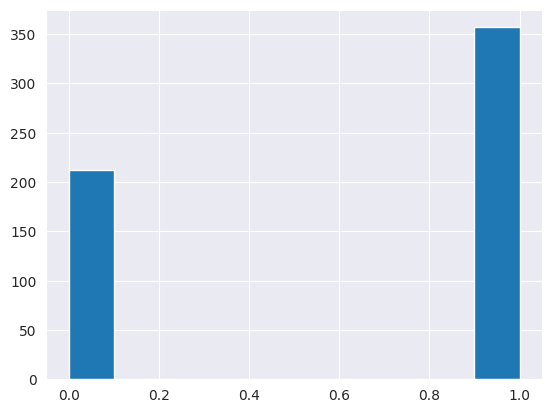

In [5]:
data["diagnosis"].hist()

<Axes: >

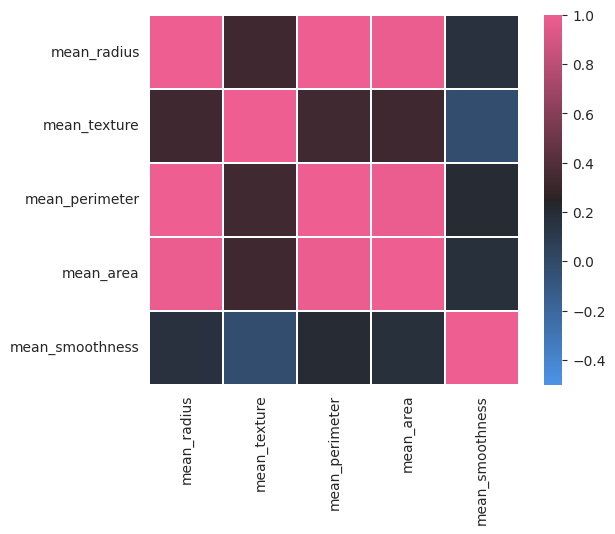

In [6]:
# The code below calculates the Pearson correlation matrix (corr) for the features of a dataset (data).
#It then creates a heatmap using Seaborn (sns.heatmap) to visually represent the correlation values.
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [7]:
# This filters the columns of a DataFrame data, keeping only the columns "mean_radius," "mean_texture," "mean_smoothness," and "diagnosis."
# It then displays the first 10 rows of the modified DataFrame.
data = data[["mean_radius", "mean_texture", "mean_smoothness", "diagnosis"]]
data.head(10)

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
5,12.45,15.70,0.12780,0
6,18.25,19.98,0.09463,0
7,13.71,20.83,0.11890,0
8,13.00,21.82,0.12730,0
9,12.46,24.04,0.11860,0


<Axes: xlabel='mean_texture', ylabel='Count'>

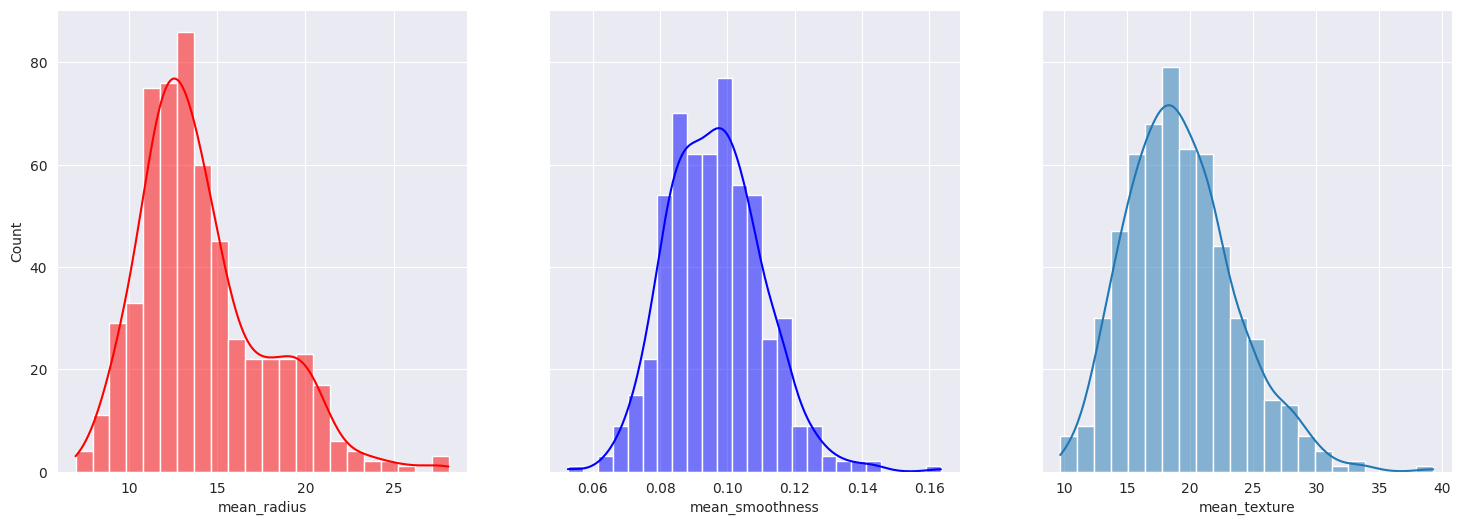

In [8]:
# Creates a figure with three subplots arranged horizontally (1 row, 3 columns)
# The figure size is set to (18 inches wide, 6 inches tall), and the y-axis is shared among the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plots a histogram of the "mean_radius" column from the data DataFrame on the first subplot with a red color
sns.histplot(data, ax=axes[0], x="mean_radius", kde=True, color='r')

# Plots a histogram of the "mean_smoothness" column from the data DataFrame on the second subplot with a blue color
sns.histplot(data, ax=axes[1], x="mean_smoothness", kde=True, color='b')

# Plots a histogram of the "mean_texture" column from the data DataFrame on the third subplot with default color
sns.histplot(data, ax=axes[2], x="mean_texture", kde=True)


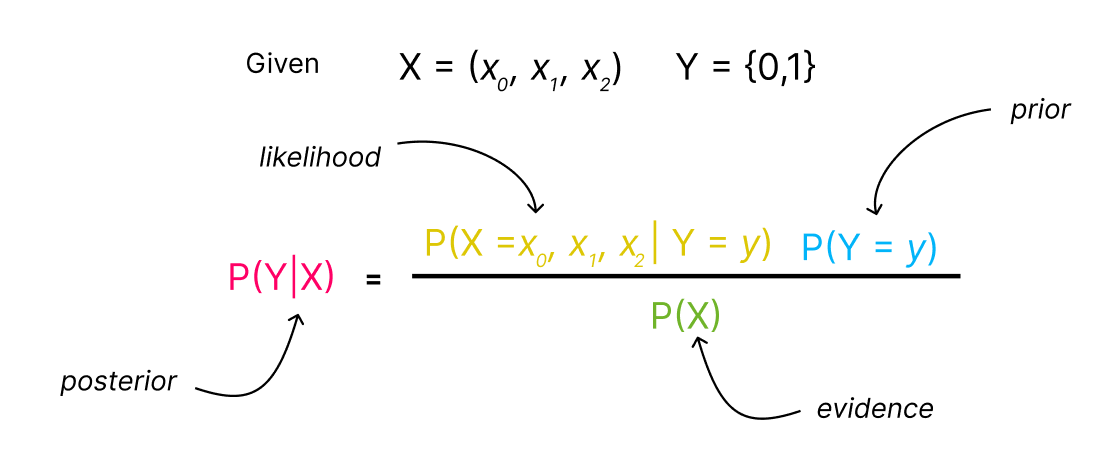

## Calculate P(Y=y) for all possible y

In [9]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

## Approach 1: Calculate P(X=x|Y=y) using Gaussian dist.

In [10]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

## Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [11]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

## Test Gaussian model

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[36  4]
 [ 0 74]]
0.9736842105263158


Accuracy: 0.9649122807017544
Precision: 0.9487179487179487
Recall: 1.0
F1 Score: 0.9736842105263158
AUC: 0.9500000000000001
Log Loss: 1.2646895926006019



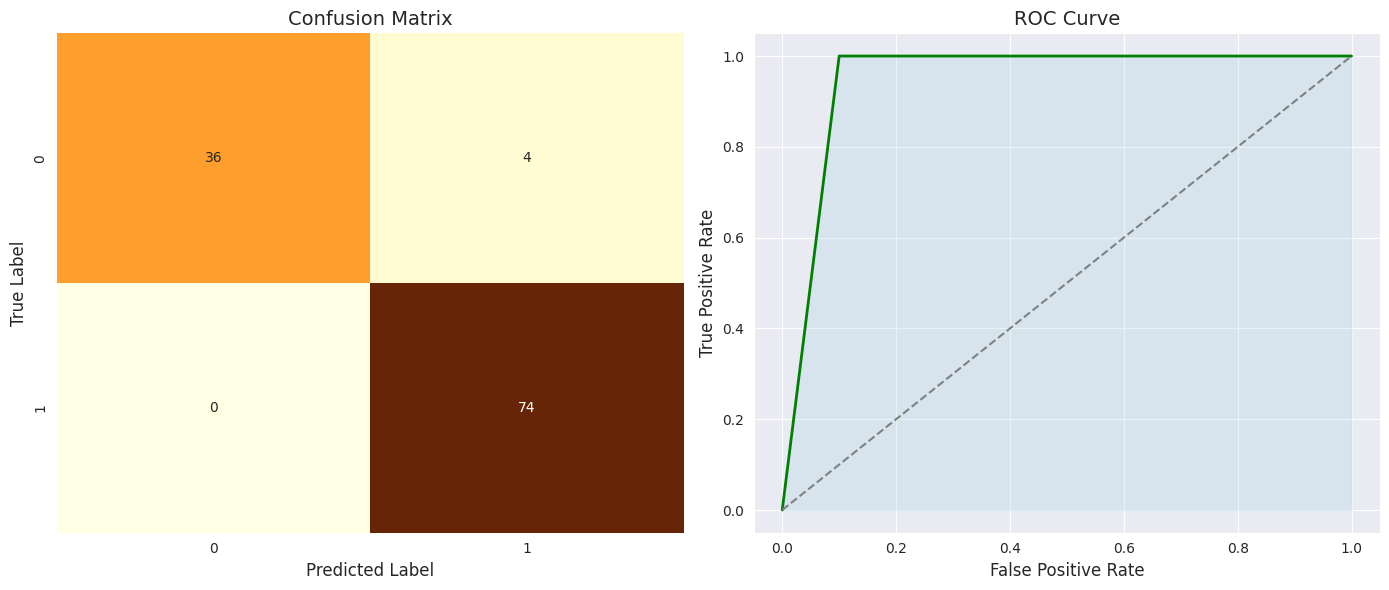

In [13]:
generate_evaluation_metrics(Y_test, Y_pred)

what does means 0? false negative ... and what about 4? false positive

## Convert continuous features to Categorical features

In [14]:
data_encoded = data.copy()
data_encoded["cat_mean_radius"] = pd.cut(data_encoded["mean_radius"].values, bins = 3, labels = [0,1,2])
data_encoded["cat_mean_texture"] = pd.cut(data_encoded["mean_texture"].values, bins = 3, labels = [0,1,2])
data_encoded["cat_mean_smoothness"] = pd.cut(data_encoded["mean_smoothness"].values, bins = 3, labels = [0,1,2])

data_encoded = data_encoded.drop(columns=["mean_radius", "mean_texture", "mean_smoothness"])
data_encoded = data_encoded[["cat_mean_radius",	"cat_mean_texture",	"cat_mean_smoothness", "diagnosis"]]
data_encoded.head(10)

,cat_mean_radius,cat_mean_texture,cat_mean_smoothness,diagnosis
0,1,0,1,0
1,1,0,0,0
2,1,1,1,0
3,0,1,2,0
4,1,0,1,0
5,0,0,2,0
6,1,1,1,0
7,0,1,1,0
8,0,1,2,0
9,0,1,1,0


## Approach 2: Calculate P(X=x|Y=y) categorically

In [15]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y

## Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum

In [16]:
def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

## Test Categorical model

In [17]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_encoded, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

[[38  2]
 [ 5 69]]
0.9517241379310345


Accuracy: 0.9385964912280702
Precision: 0.971830985915493
Recall: 0.9324324324324325
F1 Score: 0.9517241379310345
AUC: 0.9412162162162161
Log Loss: 2.2132067870510532



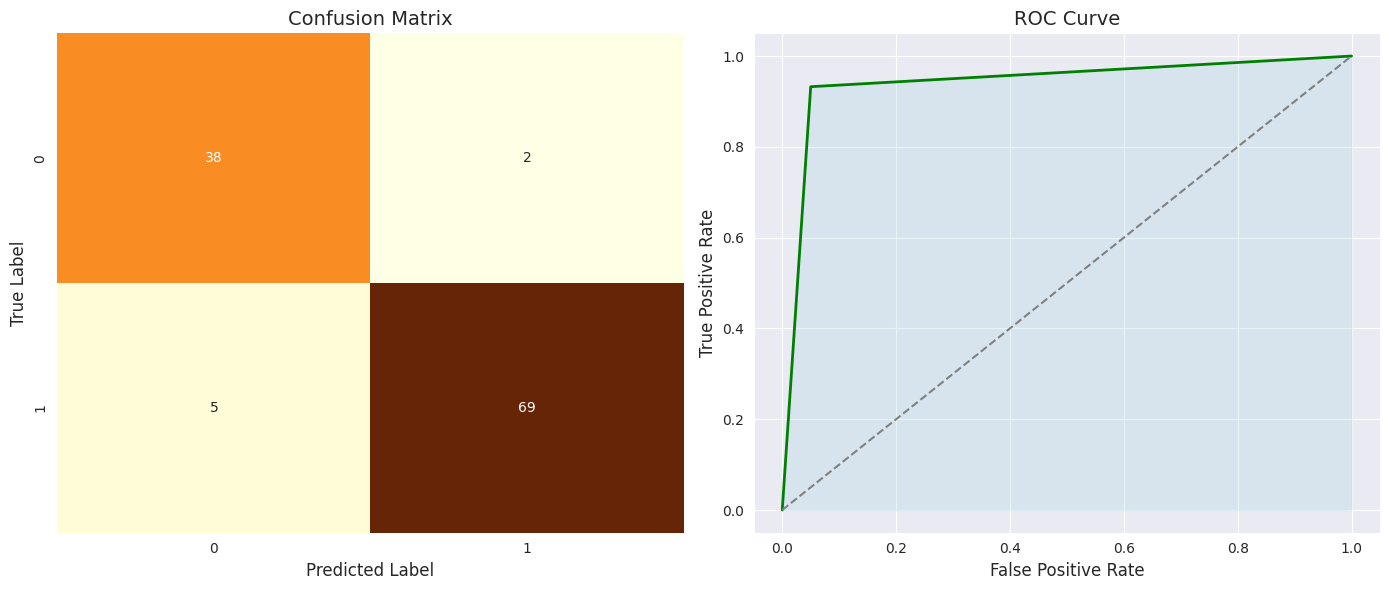

In [18]:
generate_evaluation_metrics(Y_test, Y_pred)

### Implementation of Gaussian Naive Bayes using the Scikit-learn library

Accuracy: 0.9649122807017544
Precision: 0.9487179487179487
Recall: 1.0
F1 Score: 0.9736842105263158
AUC: 0.9500000000000001
Log Loss: 1.2646895926006019



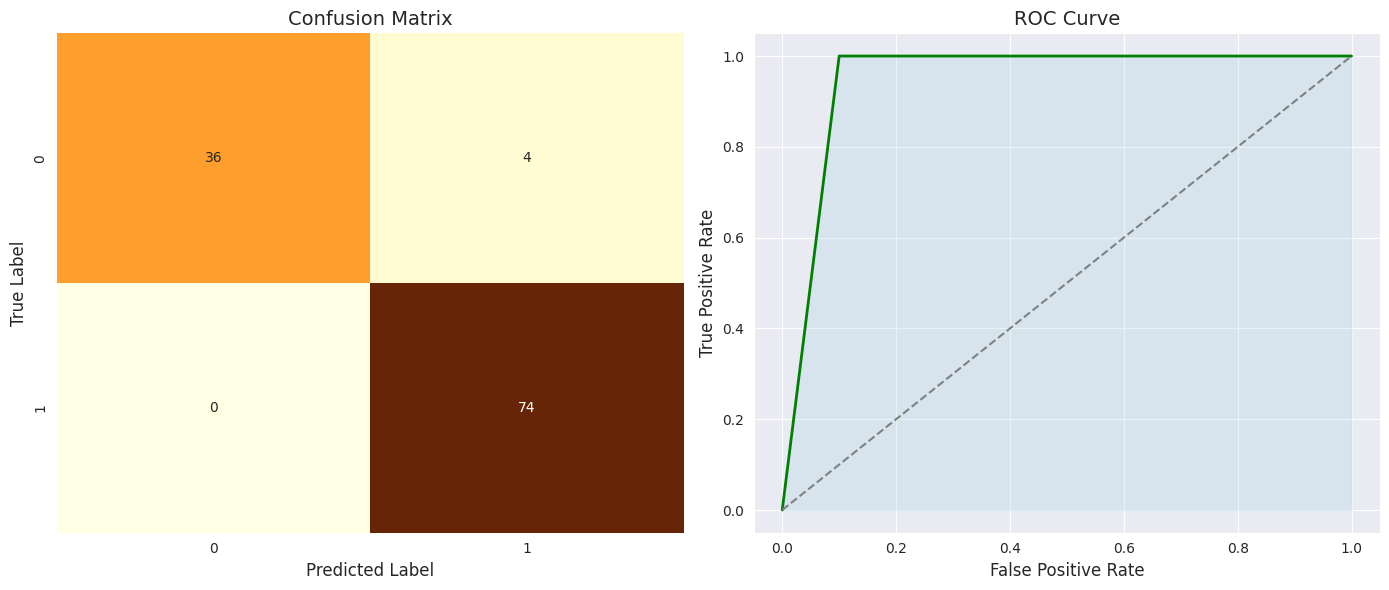

In [19]:
# Importing Gaussian Naive Bayes classifier from scikit-learn
from sklearn.naive_bayes import GaussianNB

# Splitting the data into training and testing sets using train_test_split
# Dropping the 'diagnosis' column to obtain the feature matrix (X) and using 'diagnosis' as the target variable (y)
# Setting the test size to 20% of the data and specifying a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(data.drop('diagnosis', axis=1), data['diagnosis'], test_size=.2, random_state=41)

# Instantiating the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fitting the classifier to the training data
gnb.fit(X_train, y_train)

# Making predictions on the test data
y_pred_gnb = gnb.predict(X_test)

# Generating evaluation metrics using a predefined function (generate_evaluation_metrics)
# Passing the true labels (y_test) and predicted labels (y_pred_gnb) to assess the classifier's performance
generate_evaluation_metrics(y_test, y_pred_gnb)


Accuracy: 0.9385964912280702
Precision: 0.971830985915493
Recall: 0.9324324324324325
F1 Score: 0.9517241379310345
AUC: 0.9412162162162161
Log Loss: 2.2132067870510532



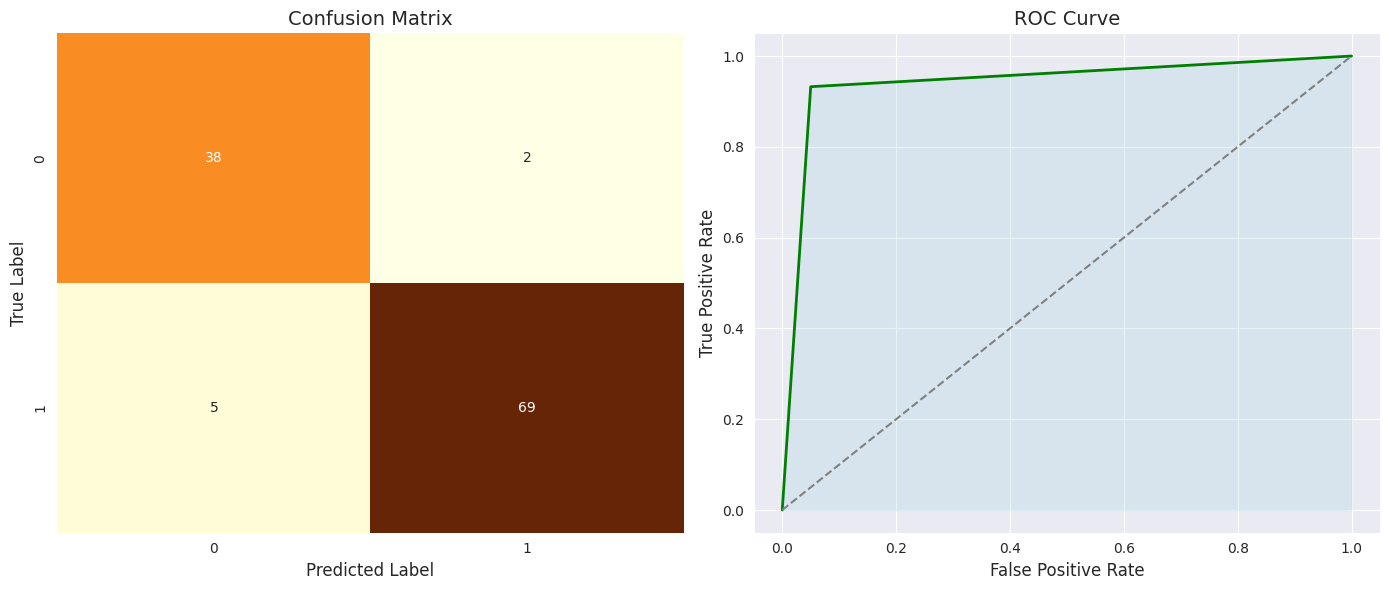

In [20]:
# Importing Categorical Naive Bayes classifier from scikit-learn
from sklearn.naive_bayes import CategoricalNB

# Splitting the encoded data into training and testing sets using train_test_split
# Dropping the 'diagnosis' column to obtain the feature matrix (X) and using 'diagnosis' as the target variable (y)
# Setting the test size to 20% of the data and specifying a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(data_encoded.drop('diagnosis', axis=1), data_encoded['diagnosis'], test_size=.2, random_state=41)

# Instantiating the Categorical Naive Bayes classifier
cat_nb = CategoricalNB()

# Fitting the classifier to the training data
cat_nb.fit(X_train, y_train)

# Making predictions on the test data
y_pred_cat = cat_nb.predict(X_test)

# Generating evaluation metrics using a predefined function (generate_evaluation_metrics)
# Passing the true labels (y_test) and predicted labels (y_pred_cat) to assess the classifier's performance
generate_evaluation_metrics(y_test, y_pred_cat)



In conclusion, the findings demonstrate strong agreement between the custom implementation and the scikit-learn implementation for both Gaussian Naive Bayes and Categorical Naive Bayes algorithms.